In [8]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import winsound
import random

In [9]:
df= pd.read_csv("../../data/processed/oline_merge.csv")

In [10]:
df = df[df.year >= df.draft_yr+4]
df =df[df.year != 2020]
len(df)

201

In [4]:
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('catchpercent',axis=1)
df = df.drop('draft_yr',axis=1)

df = df.drop('yardspergame_run',axis=1)
df = df.drop('yardsperatt',axis=1)
df = df.drop('yardspertarget',axis=1)
df = df.drop('yardsperrec',axis=1)
df = df.drop('recpergame',axis=1)
df = df.drop('yardspergame_rec',axis=1)


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [6]:
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [11]:
loaded_model = tf.keras.models.load_model('./savedmodels/norookiednn/')
predictions = loaded_model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

MSE:  2.735906130222005
RMSE:  1.6540574748847168
MAE:  1.249584093130343
ESV:  0.518537618315993


In [12]:
X_scl = scaler.fit_transform(X)
predictions = loaded_model.predict(X_scl)

In [13]:
type(y)

numpy.ndarray

In [14]:
type(predictions)

numpy.ndarray

Text(0, 0.5, 'real')

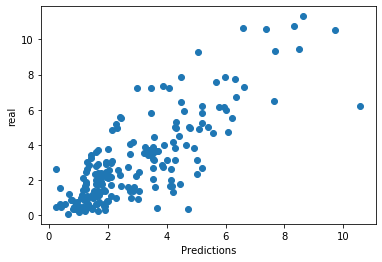

In [15]:
plt.scatter(predictions,y)
plt.xlabel("Predictions")
plt.ylabel('real')

In [109]:
Aaron_Jones2020 = np.array([26,182,201,1104,9,77,14,14,63,47,355,2,15,30,2,5,3,1])

In [23]:
rbs =pd.read_csv("../../data/rbs_to_predict.csv")
names = rbs['playername'].values
rbs = rbs.drop('tm',axis=1)
rbs = rbs.drop('playername',axis=1)

In [24]:
rbs

,2021capperc,age,draft_pos,attempts,yards_run,tds_run,longgain_run,g,gs,tgt,rec,yards_rec,tds_rec,firstdowns,longgain_rec,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
0,2.369000,27,182,201,1104,9,77,14,14,63,47,355,2,15,30,2,5,3,1
1,1.592000,27,73,239,955,10,69,15,13,31,25,137,0,5,18,3,30,19,25
2,1.796000,26,257,144,723,6,36,16,6,13,9,129,0,4,34,1,8,1,5
3,0.928800,26,205,169,721,6,59,13,11,43,35,215,0,10,18,2,32,32,28
4,1.327000,27,249,141,681,5,29,12,12,46,37,287,4,14,29,1,10,15,17
5,0.862527,26,134,119,505,2,25,14,3,35,31,236,1,11,29,0,5,3,1
6,1.630000,27,257,118,502,1,55,11,8,14,7,28,0,1,11,0,28,12,32


In [31]:
names

array(['Aaron Jones', 'Kenyan Drake', 'Gus Edwards', 'James Conner',
       'Chris Carson', 'Jamaal Williams', 'Phillip Lindsay'], dtype=object)

In [30]:
real_y = rbs['2021capperc'].values
rbs= rbs.drop('2021capperc',axis=1).values

# for i in range(len(names)):
#     print(names[i])
#     print(rbs.iloc[i].to_numpy())
#     print(loaded_model.predict(scaler.transform(rbs.iloc[i].to_numpy().reshape(1, -1))))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices